# Array indexing

## Integer array indexing

In [1]:
import numpy as np

In [3]:
a = np.array([[1,2], [3,4], [5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
a[[0, 1, 2], [0, 1, 0]]

array([1, 4, 5])

In [5]:
a[range(3), [0, 1, 0]]

array([1, 4, 5])

In [6]:
np.array([a[0, 0], a[1, 1], a[2, 0]])

array([1, 4, 5])

In [7]:
a[[0, 0], [1, 1]]

array([2, 2])

In [8]:
np.array([a[0, 1], a[0, 1]])

array([2, 2])

In [9]:
np.arange(4)

array([0, 1, 2, 3])

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [12]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [13]:
b = np.array([0, 2, 0, 1])
b

array([0, 2, 0, 1])

In [14]:
a[range(4), b]

array([ 1,  6,  7, 11])

In [15]:
a[np.arange(4), b] += 10

In [16]:
a

array([[11,  2,  3],
       [ 4,  5, 16],
       [17,  8,  9],
       [10, 21, 12]])

## Boolean array indexing

In [17]:
a = np.array([[1,2], [3, 4], [5, 6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [18]:
bool_idx = (a > 2)
bool_idx

array([[False, False],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [19]:
a[bool_idx]

array([3, 4, 5, 6])

In [20]:
a[[a > 2]]

array([3, 4, 5, 6])

# Broadcasting

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:



In [21]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x


In [22]:
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [23]:
v

array([1, 0, 1])

In [24]:
y

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [25]:
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

In [26]:
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This works; however when the matrix x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:

反正也是把v重复加到x的每一行上，所以直接把v变成每一行都相同的matrix，直接与x相加即可

In [27]:
vv = np.tile(v, (4, 1)) 
vv

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [28]:
y = x + vv
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

不过幸运的是，在numpy里，不用把v变成vv，直接就可以相加

In [29]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [30]:
v = np.array([1, 0, 1])
v

array([1, 0, 1])

In [31]:
y = x + v
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Here are some applications of broadcasting:


In [32]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]

In [34]:
np.reshape(v, (3, 1))

array([[1],
       [2],
       [3]])

In [33]:
np.reshape(v, (3, 1)) * w

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

In [37]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
x
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
x + v

array([[2, 4, 6],
       [5, 7, 9]])

In [38]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
(x.T + w).T

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [39]:
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same output.
x + np.reshape(w, (2, 1))

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [43]:
x + w
# 必须把w变成（2，1）才能使用broad

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [40]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
w

array([4, 5])

# SciPy

## Image operations



In [1]:
from scipy.misc import imread, imsave, imresize

In [3]:
img = imread('assets/cat.jpg')

In [4]:
print(img.dtype, img.shape)

uint8 (400, 248, 3)


In [5]:
# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

In [6]:
# Resize the tinted image to be 300 by 300 pixels
img_tinted = imresize(img_tinted, (300, 300))

In [8]:
img_tinted.shape

(300, 300, 3)

In [9]:
# Write the tinted image back to disk
imsave('assets/cat_tinted.jpg', img_tinted)

## Distance between points

SciPy defines some useful functions for computing distances between sets of points.

The function scipy.spatial.distance.pdist computes the distance between all pairs of points in a given set:

squareform: converts between condensed distance matrices and square distance matrices.

In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform


In [11]:
# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
x

array([[0, 1],
       [1, 0],
       [2, 0]])

In [12]:
# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
d

array([[ 0.        ,  1.41421356,  2.23606798],
       [ 1.41421356,  0.        ,  1.        ],
       [ 2.23606798,  1.        ,  0.        ]])

In [13]:
pdist(x, 'euclidean')

array([ 1.41421356,  2.23606798,  1.        ])

# Matplotlib

## Plotting



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

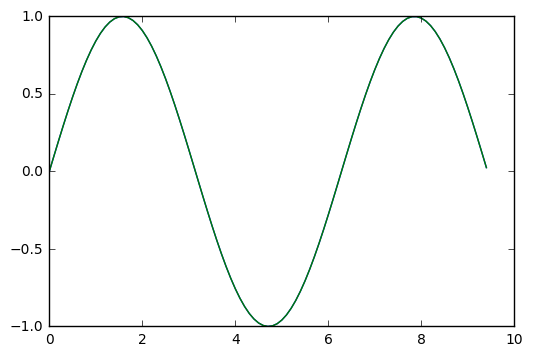

In [4]:
# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.


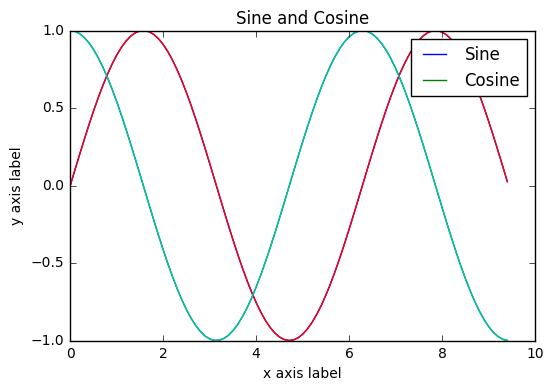

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Subplots

You can plot different things in the same figure using the subplot function. Here is an example

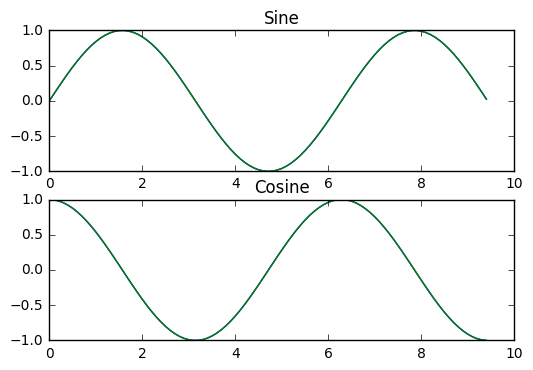

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

## Images

You can use the imshow function to show images. Here is an example:

In [9]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

In [10]:
# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

In [11]:
# Show the tinted image
plt.subplot(1, 2, 2)

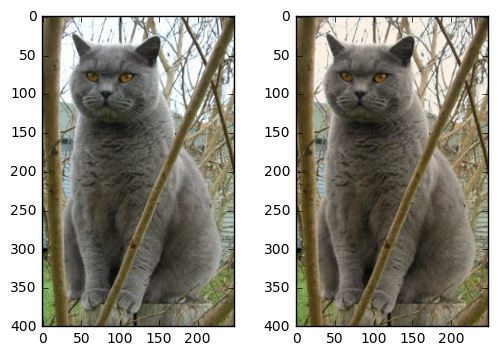

In [12]:
# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()